### PHASE 3 PROJECT

Team Mentor Name: Winnie Anyoso

Student name: Joseline Apiyo Odhiambo
Blog Post:https://github.com/Jodhiamboapiyo/Classification_model/blob/master/Submited.ipynb

### Introduction

## Overview

This analysis is based on churning of customers based Syria Telecommunications company.

We will use machine learning techniques to analyze telecommunications data and customer behavior patterns, with the goal of deriving actionable insights, enhancing service quality and majorly customer retention.



### Bussiness understanding

In the telecommunications industry, churn is a significant concern as it directly impacts revenue and market share.

The primary goal of churn analysis is to understand the factors that lead customers to switch to competitors or discontinue service altogether.

By identifying patterns and behaviors that precede customer churn, companies can develop proactive strategies to enhance customer retention, improve customer satisfaction, and maintain a stable revenue stream


### Data Understanding

The dataset used in this project analysis is the SyriaTel Customer Churn dataset.
The dataset includes features like call duration, charges, customer service calls, and international plan status. Analysis through descriptive statistics, visualization, and correlation helped identify key predictors of customer churn. The goal was to develop predictive models to improve customer retention and business performance at SyriaTel.

## 1.DATA PREPARATION

A)Loading the data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [3]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]

Saving data.csv to data.csv


In [4]:
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Displaying the statistical summary of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


##B) Explanatory Data Analysis
**Data cleaning**

**Checking for missing values in the columns**

In [7]:
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


**It is clear that the dataset has no missing data and the imputer is not needed for filling in the mising values**


## From the above information, we can see that our dataset does not contain any null values, so there is no need to include an imputer. The column description is as follows:

1. state- state where the customer resides.
2. area code- area code associated with the customer's phone number.
3. phone number- customer's phone number.
4.account length- duration of the customer's account with the telecom company (measured in months).
4. international plan- Whether the customer has an international calling plan (Yes/No).
5. voice mail plan- Whether the customer has a voicemail plan (Yes/No).
6. number email messages- number of voicemail messages the customer has.
7. total day minutes- total number of minutes the customer used during the daytime.
8. total day calls- total number of calls the customer made during the daytime.
9. total day charge- total charge (in currency) for daytime usage.
10. total eve minutes- total number of minutes the customer used during the evening.
11. total eve calls- total number of calls the customer made during the evening.
12. total eve charge- total charge (in currency) for evening usage.
13. total night minutes- total number of minutes the customer used during the nighttime.
14. total night calls- total number of calls the customer made during the nighttime.
15. total night charge- total charge (in currency) for nighttime usage.
16. total intl minutes- total number of international minutes used by the customer.
17. total intl calls- total number of international calls made by the customer.
18. total intl charge- total charge (in currency) for international usage.
19. customer service calls- number of customer service calls made by the customer.
20. churn- the target variable indicating whether the customer churned (discontinued the service) or not.


**Identify numerical and categorial variables**

In [8]:
# Getting numerical columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numeric_columns)

# Getting categorical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')
Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')


##C)Dropping the columns

**Some features are not usufull in making a prediction whether a customer is going to churn or not.**

The columns include:


*   Phone number
*   state

**This colunms were dropped as they were not important in making a prediction. State and area code would only limit the geographical locations of the customers.**

I dropped the **phone number** column because it is likely irrelevant to predicting whether a customer will churn. Here are a few reasons why:


* Irrelevance to Churn: The phone number is simply an identifier and does not contain any meaningful information that would help in predicting churn. It's unique for each customer and does not contribute to the predictive power of the model.
* Non-Numeric and Non-Categorical Data: Since phone number is a unique identifier (likely in string format), it does not have a numerical or categorical relationship with the target variable (churn). Including such data would not be useful in a regression model and might even confuse the model, leading to poor performance.

I dropped the **State** column because it is likely irrelevant to predicting whether a customer will churn. Here are is the reason why:


* The state column represents the geographic location of the customer. In many cases, the state might not have a strong predictive value for customer churn, especially if the service is uniformly provided across different states. If there's no significant difference in customer behavior by state, this column might add noise rather than useful information.







In [9]:
# Dropping the 'phone number' and 'state' columns from the DataFrame
df = df.drop(columns=['phone number', 'state'])

# Check the first few rows to confirm the columns are dropped
df.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.0 FEATURE DISTRIBUTION

##1.1 Numerical Features

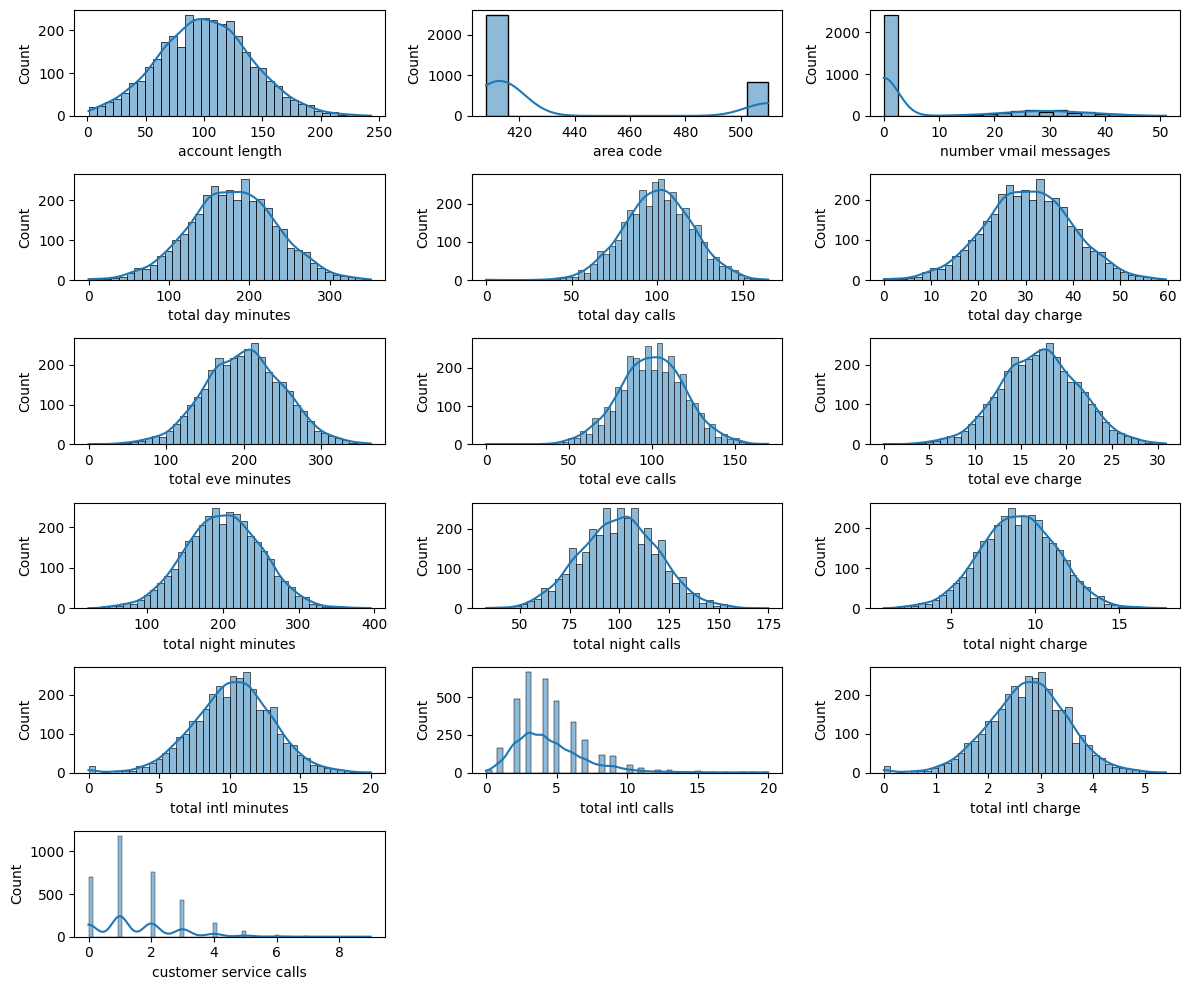

In [10]:
# Correct numeric features list based on actual column names
numeric_features = ['account length', 'area code', 'number vmail messages',
                    'total day minutes', 'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge',
                    'customer service calls']

# Calculating the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Creating subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plotting numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Removing empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjustting subplot spacing
fig.tight_layout()

# Displaying the plot
plt.show()


**majority of the features have a normal distribution**

##1.2 Categorical Features

**Distribution of Churn and Area code**

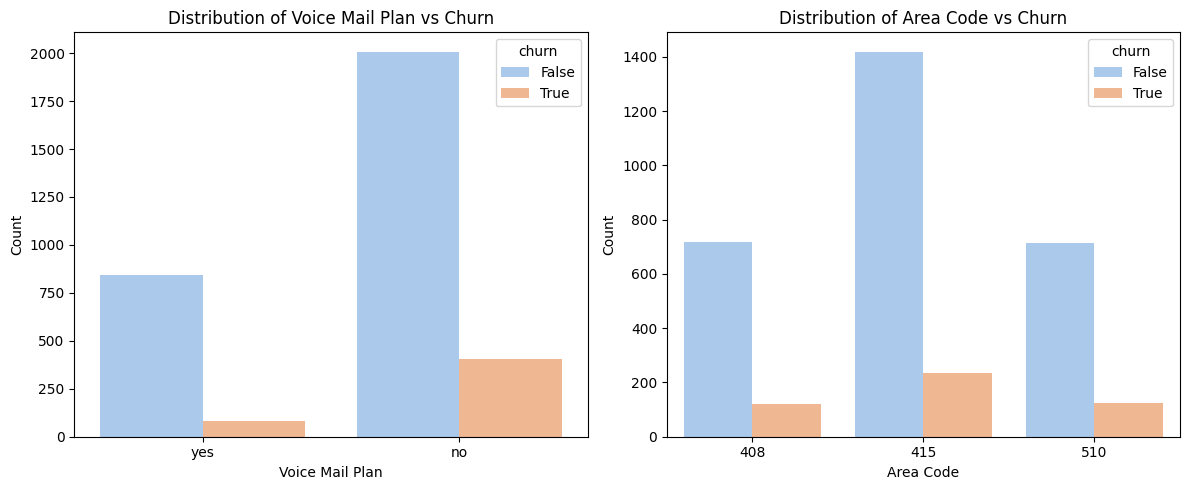

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Plot 1: Distribution of 'voice mail plan' against 'churn'
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='voice mail plan', hue='churn', palette='pastel')
plt.title('Distribution of Voice Mail Plan vs Churn')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Plot 2: Distribution of 'area code' against 'churn'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='area code', hue='churn', palette='pastel')
plt.title('Distribution of Area Code vs Churn')
plt.xlabel('Area Code')
plt.ylabel('Count')

# Adjust the layout
plt.tight_layout()

# Show plots
plt.show()

**Explanation**

**1.Distribution of voice mail plan vs churn**

*   More customers without a voicemail plan have churned: There is a higher frequency of churn among customers without a voicemail plan (labeled as "no" on the x-axis) compared to those with a voicemail plan (labeled as "yes" on the x-axis).

**2.Distribution of area code vs churn**


*  The plot shows that the churn rate differs across area codes, with some having higher rates than others. For example, area code 408 appears to have a higher churn rate than area codes 415 and 510, as indicated by the taller blue bar for 408.




##1.3 Analyzing Correlation Between Numeric Features

The correlation matrix provides insights into how each feature relates to one another, which can help us identify patterns and dependencies in our data.

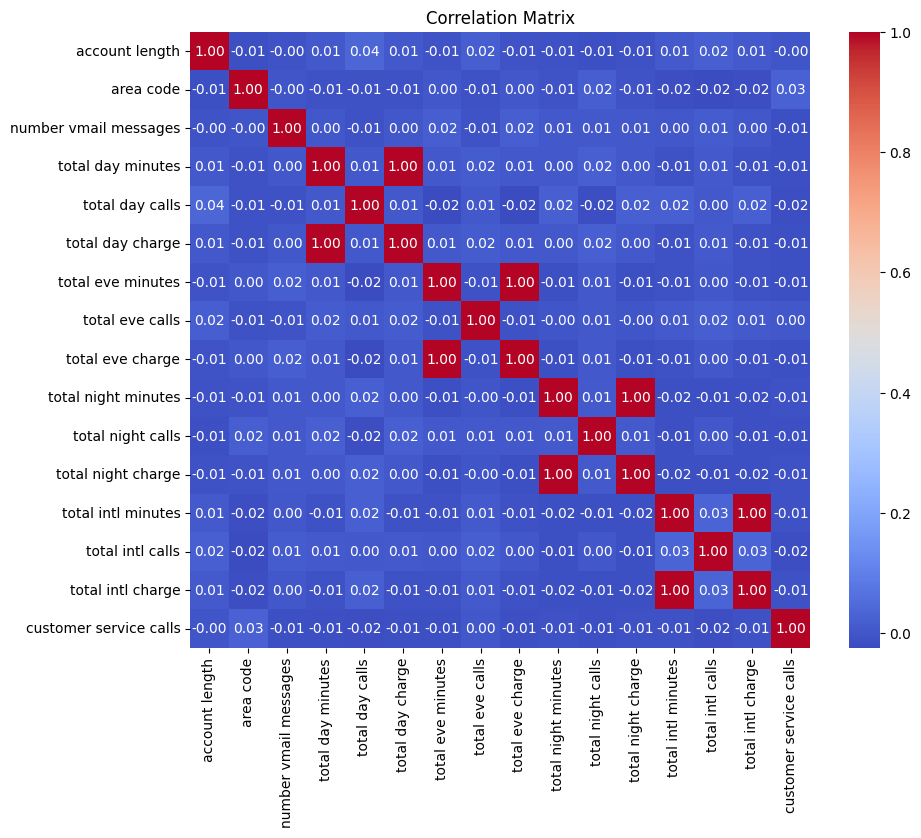

In [12]:
# Calculate correlation matrix
correlation_matrix = df[numeric_features].corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and show the plot
plt.title('Correlation Matrix')
plt.show()

## Columns with high correlation

In [13]:
# Initialize a set to keep track of already printed pairs
printed_pairs = set()

for col in numeric_features:
    for corr_col in numeric_features:
        if col != corr_col and abs(correlation_matrix.loc[col, corr_col]) > 0.8:
            # Create a sorted tuple of the pair to ensure uniqueness
            pair = tuple(sorted((col, corr_col)))
            if pair not in printed_pairs:
                printed_pairs.add(pair)
                print(f"{col} and {corr_col} have a correlation of {correlation_matrix.loc[col, corr_col]}")


total day minutes and total day charge have a correlation of 0.9999999521904007
total eve minutes and total eve charge have a correlation of 0.9999997760198491
total night minutes and total night charge have a correlation of 0.9999992148758795
total intl minutes and total intl charge have a correlation of 0.9999927417510314


In [14]:
#Removing features with high correlation value
df_numeric_new = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df_numeric_new.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


##1.4 Feature selection to remove features with high multicollinearity

**These features are highly correlated which and needs to be addressed to resolve multicollinearity issues.**

Multicollinearity occurs when two or more features in a dataset are highly correlated, meaning they provide redundant information.

*   Impact on Model Performance: In classification models like logistic regression, multicollinearity can inflate the variance of the coefficient estimates, making them unstable and less interpretable.




##1.5 Detecting Outliers

**Impacts of Outliers in Classification Models**

*  Model Performance: Outliers can distort the decision boundary in classification models, leading to less accurate predictions. Models might become too sensitive to these outliers, affecting the overall performanc
*  Bias and Variance: Outliers can increase the variance of the model, leading to overfitting. This can make the model too complex and less generalizable to new data.
*   Feature Importance: Outliers can affect the importance of features, potentially leading to misleading insights about which features are most relevant for classification.





In [15]:
## Use z-score
import numpy as np
from scipy import stats

# Calculate Z-scores for each feature
z_scores = np.abs(stats.zscore(df[numeric_features]))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Print the number of outliers
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

Number of outliers: 164


It is important to visualize outliers before removing them.

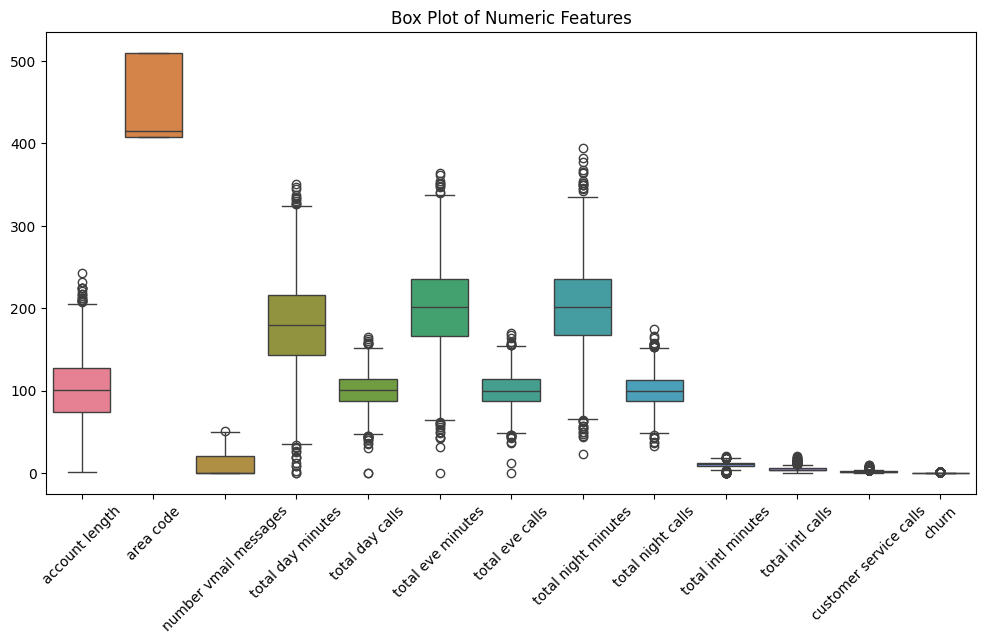

In [16]:
##Plotting a box plot to visualize the outliers and I will divide the columns into two.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df_numeric_new.columns])
#plt.xticks(rotation=45
plt.title('Box Plot of Numeric Features')
plt.xticks(rotation=45)
plt.show()


**The visualization above is not readable. I will divide this columns into two**

<ipython-input-22-97d59c16402a>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_columns1, rotation=45)
<ipython-input-22-97d59c16402a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_columns2, rotation=45)


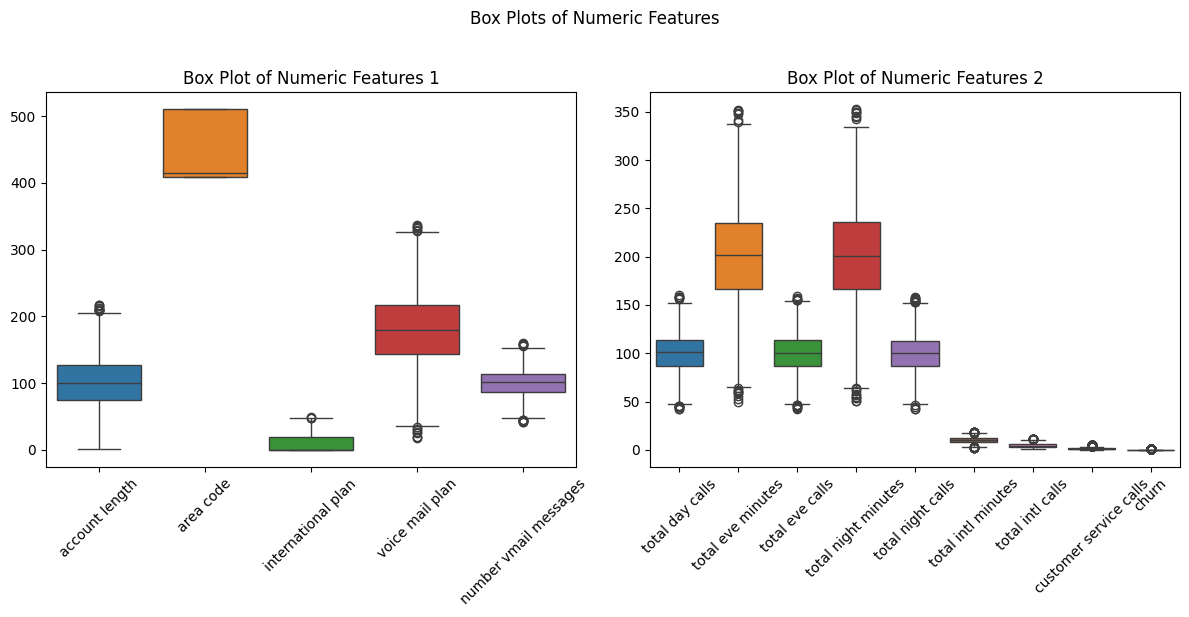

In [22]:
#Plotting the subplots
df_columns1 = df_numeric_new.columns[:7]
df_columns2 = df_numeric_new.columns[6:]

#Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[df_columns1], ax=axes[0])
axes[0].set_title('Box Plot of Numeric Features 1')
axes[0].set_xticklabels(df_columns1, rotation=45)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[df_columns2], ax=axes[1])
axes[1].set_title('Box Plot of Numeric Features 2')
axes[1].set_xticklabels(df_columns2, rotation=45)

#Figure subtitle
plt.suptitle('Box Plots of Numeric Features', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()



In [23]:
# Remove outliers from the original DataFrame in place
df.drop(df[outliers].index, inplace=True)

# Print the number of outliers removed
num_outliers_removed = outliers.sum()
print(f"Number of outliers removed: {num_outliers_removed}")

Number of outliers removed: 164


<ipython-input-23-03e11b7bf8ac>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.drop(df[outliers].index, inplace=True)


In [24]:
#Shape of the DT after removing the outliers
df.shape


(3169, 19)

## 3. DATA PREPROCESSING

 **Feature Engeneering**

Feature engineering is the process of modifying or generating new features in a dataset to enhance the performance of machine learning models

This involves techniques such as one-hot encoding for categorical variables with many categories and scaling numerical features to ensure that all features contribute equally to the model's learning process.

These practices are essential for boosting model accuracy and enabling the model to effectively learn from the data.

In [25]:
# Getting categorical columns
categorical_columns = df[['international plan','voice mail plan','churn']].columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['international plan', 'voice mail plan', 'churn'], dtype='object')


**a) One hot encoding and converting boolean values to intergers**

This ensures that categorical data is transformed into a numerical format that models can effectively learn from without introducing biases or misinterpretations related to the nature of the data.



In [26]:
#Perform one hot encoding
one_hot_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_encoded], axis=1)


In [27]:

# Convert the one-hot encoded columns from boolean to integer
df_encoded['international plan_yes'] = df_encoded['international plan_yes'].astype(int)
df_encoded['voice mail plan_yes'] = df_encoded['voice mail plan_yes'].astype(int)

# Converting the 'churn' column from boolean to integer
df_encoded['churn'] = df_encoded['churn'].astype(int)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [28]:
# Moving the 'churn' column to the last position
df_encoded = df_encoded[[col for col in df_encoded.columns if col != 'churn'] + ['churn']]

# Displaying the first few rows of the updated DataFrame
df_encoded.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3169 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3169 non-null   int64  
 1   area code               3169 non-null   int64  
 2   number vmail messages   3169 non-null   int64  
 3   total day minutes       3169 non-null   float64
 4   total day calls         3169 non-null   int64  
 5   total day charge        3169 non-null   float64
 6   total eve minutes       3169 non-null   float64
 7   total eve calls         3169 non-null   int64  
 8   total eve charge        3169 non-null   float64
 9   total night minutes     3169 non-null   float64
 10  total night calls       3169 non-null   int64  
 11  total night charge      3169 non-null   float64
 12  total intl minutes      3169 non-null   float64
 13  total intl calls        3169 non-null   int64  
 14  total intl charge       3169 non-null   float

**Now we have all the columns in numbers, either a float or an integer**

In [ ]:
df.shape

(3169, 19)

##4. MODELLING

 We start with logistic regression, which is valued for its simplicity and interpretability, allowing us to clearly understand the relationship between the features and the binary outcome.

 Decision trees, whose straightforward, hierarchical structure helps reveal intricate decision boundaries and patterns in the data.

 Hyperparameter tuning to enhance model performance.

 This techniques together provide a robust approach to developing accurate and reliable predictive models.

**a) Splitting the data**

The data set will be divided the into separate subsets, typically a training set and a testing set.

The training and test set will be divided in a percentage of 80-20% and the random state of 42.

**Define X and y**

In [43]:
#Defining X and y
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets to ensure proper splitting
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2535, 18) (2535,)
Testing set shape: (634, 18) (634,)


**b) Feature Scalling**

Feature scaling is crucial for ensuring that all features contribute equally to the learning process of a machine learning model.

Standardization technique is used to improve model performance, speed up convergence, and ensure that the data is in an optimal format for analysis.

In [44]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##5. MODELS

The two models to be used are:

Logistic Regression and Decision Trees.

*   Logistic Regression
*   Decision Trees



**a) Logistic Regression**

Decision Trees are useful for capturing non-linear relationships and interactions between features.

In [45]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(fit_intercept=True, C=1e12, solver='liblinear')

model_log = logreg.fit(X_train_scaled, y_train)
model_log


LogisticRegression(C=1000000000000.0, solver='liblinear')

**Performance on training data and test data**

In [47]:
import numpy as np
from sklearn.metrics import precision_recall_curve, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

## Predicting probabilities for the positive class (churn cases) for both training and test sets
y_train_prob_logistic = model_log.predict_proba(X_train_scaled)[:, 1]
y_test_prob_logistic = model_log.predict_proba(X_test_scaled)[:, 1]

# Setting a decision threshold
threshold = 0.3

# Converting probabilities to binary predictions using the specified threshold
y_train_pred_adjusted = (y_train_prob_logistic >= threshold).astype(int)
y_test_pred_adjusted = (y_test_prob_logistic >= threshold).astype(int)

# Evaluating the model using the adjusted threshold for training data
accuracy_train_adjusted = accuracy_score(y_train, y_train_pred_adjusted)
report_train_adjusted = classification_report(y_train, y_train_pred_adjusted)
auc_train_adjusted = roc_auc_score(y_train, y_train_prob_logistic)

print(f"Logistic Regression Training Accuracy (Threshold = {threshold}): {accuracy_train_adjusted}")
print(f"Logistic Regression Training Classification Report (Threshold = {threshold}):\n{report_train_adjusted}")
print(f"Logistic Regression Training AUC (Threshold = {threshold}): {auc_train_adjusted}")

# Evaluating the model using the adjusted threshold for test data
accuracy_test_adjusted = accuracy_score(y_test, y_test_pred_adjusted)
report_test_adjusted = classification_report(y_test, y_test_pred_adjusted)
auc_test_adjusted = roc_auc_score(y_test, y_test_prob_logistic)

print(f"Logistic Regression Test Accuracy (Threshold = {threshold}): {accuracy_test_adjusted}")
print(f"Logistic Regression Test Classification Report (Threshold = {threshold}):\n{report_test_adjusted}")
print(f"Logistic Regression Test AUC (Threshold = {threshold}): {auc_test_adjusted}")


Logistic Regression Training Accuracy (Threshold = 0.3): 0.8658777120315582
Logistic Regression Training Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2191
           1       0.51      0.46      0.48       344

    accuracy                           0.87      2535
   macro avg       0.71      0.69      0.70      2535
weighted avg       0.86      0.87      0.86      2535

Logistic Regression Training AUC (Threshold = 0.3): 0.8278793797034381
Logistic Regression Test Accuracy (Threshold = 0.3): 0.8485804416403786
Logistic Regression Test Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       536
           1       0.51      0.45      0.48        98

    accuracy                           0.85       634
   macro avg       0.71      0.69      0.69       634
weighted avg       0.84      0.85      0.84   

##Training Data:

**Accuracy:** The model achieved an accuracy of approximately 86.59%, indicating that 86.59% of the predictions for the training data were correct.

**Precision and Recall:**  For class 1 (churn), the precision is 0.51, meaning that when the model predicts churn, it is correct 51% of the time.

The recall for class 1 is 0.46, indicating that the model correctly identifies 46% of actual churn cases.


**AUC:** The AUC (Area Under the Curve) of 0.8279 suggests that the model has a good ability to distinguish between the two classes, though there is still room for improvement in differentiating between churn and non-churn customers.


##Test Data:

**Accuracy:** The test accuracy is 84.86%, which is slightly lower than the training accuracy, suggesting some generalization to unseen data but also potential for slight overfitting.


**Precision and Recall:** For class 1 (churn) on the test data, precision is 0.51 and recall is 0.45, similar to the training results.

This indicates that the model maintains its performance across both datasets, but the ability to recall churn cases is relatively low.

**AUC:** The test AUC is 0.7862, lower than the training AUC, showing a decent but not outstanding model performance in terms of distinguishing between churn and non-churn customers.

**conclusion:**
The logistic regression model performs reasonably well with an adjusted threshold, capturing more churn cases (higher recall) than with the default threshold

## ROC Curves for Training and Test Sets

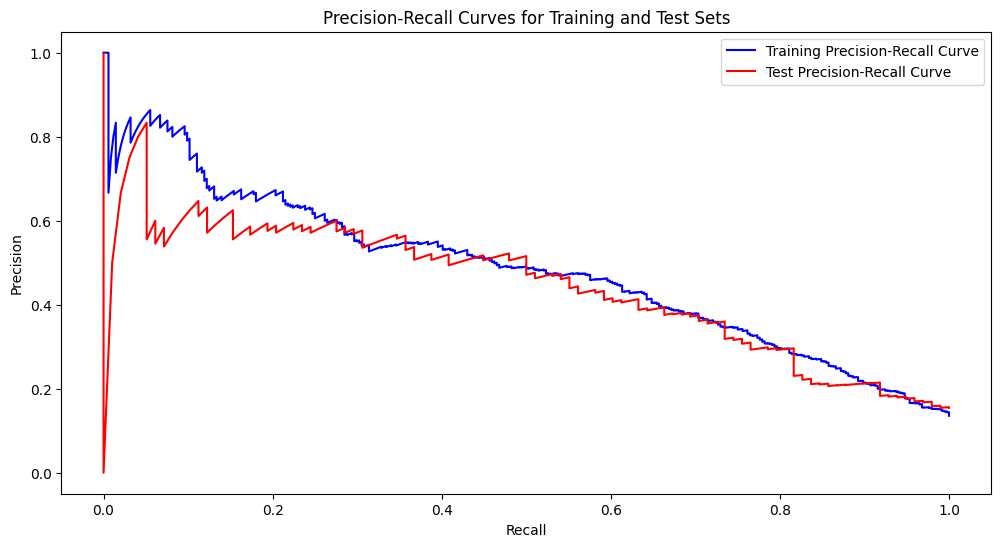

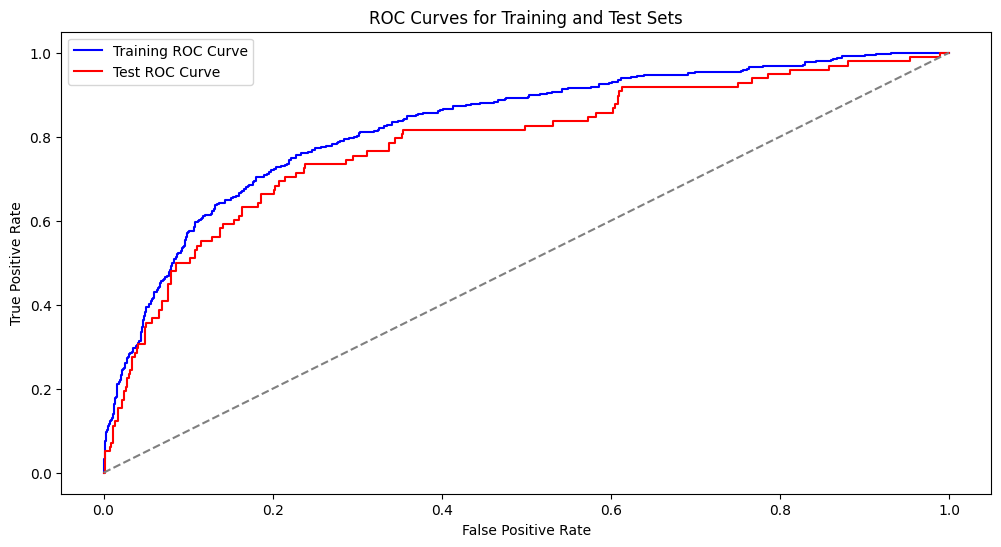

In [48]:
# Plotting Precision-Recall Curve for both training and test sets
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_prob_logistic)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob_logistic)

plt.figure(figsize=(12, 6))
plt.plot(recall_train, precision_train, label='Training Precision-Recall Curve', color='b')
plt.plot(recall_test, precision_test, label='Test Precision-Recall Curve', color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Training and Test Sets')
plt.legend()
plt.show()


# Plotting ROC Curve for both training and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob_logistic)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_logistic)

plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve', color='b')
plt.plot(fpr_test, tpr_test, label='Test ROC Curve', color='r')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Training and Test Sets')
plt.legend()
plt.show()

**Analysis of the ROC curve**

A Curve closer to 1 indicates a better performance. From the graphical representation above, it shows that that Training data is performing better thank the test data.

However, there is a slight disparity between test data and training data which also reflects that the model is performing well too on test data and can be used to predict churning of customers.

**b) Decision Tree**

Let us move to decision trees to see if the recall value will improve.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train_scaled, y_train)

# Predict on the training and test data
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)


In [50]:
# Predict probabilities for ROC curve
y_train_prob = dt.predict_proba(X_train_scaled)[:, 1]
y_test_prob = dt.predict_proba(X_test_scaled)[:, 1]

In [51]:
# Evaluate the model using classification report
print("Decision Tree Training Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Decision Tree Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# ROC AUC Score
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("Training AUC:", train_auc)
print("Test AUC:", test_auc)


Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00       344

    accuracy                           1.00      2535
   macro avg       1.00      1.00      1.00      2535
weighted avg       1.00      1.00      1.00      2535

Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       536
           1       0.70      0.72      0.71        98

    accuracy                           0.91       634
   macro avg       0.82      0.83      0.83       634
weighted avg       0.91      0.91      0.91       634

Training AUC: 1.0
Test AUC: 0.8333269875114225


##Analysis


##Training Data:

**Accuracy:**

The training accuracy is 100%, indicating that the model perfectly classified all instances in the training set.


**Precision, Recall, and F1-Score:** All metrics are perfect (1.00) for both classes (churn and non-churn), which means the model correctly predicted every instance without any errors.


**AUC:** The AUC score is 1.0, suggesting perfect separation between the classes in the training data.


##Test Data:

**Accuracy:** The test accuracy is 91%, showing that the model performs well on unseen data, but not perfectly.


**Precision and Recall:**
For class 0 (non-churn), the precision is 0.95, and the recall is 0.94, indicating high accuracy in predicting non-churn cases.

For class 1 (churn), the precision is 0.70, and the recall is 0.72. This shows a reasonable ability to correctly identify churn cases, though not as strong as for non-churn cases.


**F1-Score:** The F1-score for churn (class 1) is 0.71, balancing the trade-off between precision and recall.


**AUC:** The AUC score is 0.83, which is good but not perfect, suggesting the model's ability to distinguish between churn and non-churn customers is decent, though not as strong as in the training set.


##Conclusion:

The Decision Tree model shows signs of overfitting, as evidenced by its perfect performance on the training data but a drop in performance on the test data.

We will try hyperparameter tuning to resolve the signs of overfitting.

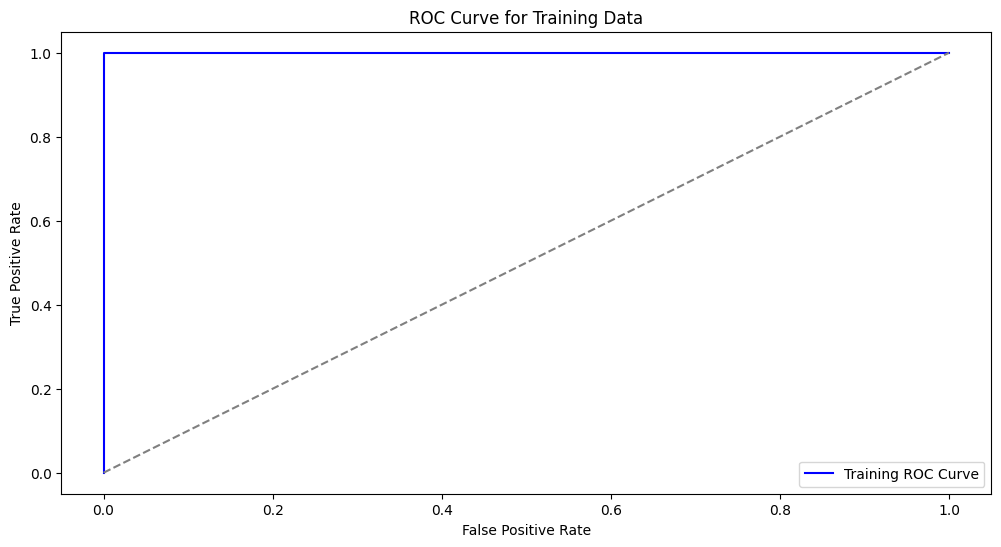

In [52]:
# Plot ROC Curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
plt.figure(figsize=(12, 6))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve', color='b')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend()
plt.show()


##6. TUNE THE MODEL

##Hyperparameter tuning

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the model
decision_tree = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Decision Tree with the best parameters
best_decision_tree = grid_search.best_estimator_

# Predict on the training and test sets
y_train_pred = best_decision_tree.predict(X_train_scaled)
y_test_pred = best_decision_tree.predict(X_test_scaled)

# Predict probabilities for ROC AUC
y_train_prob = best_decision_tree.predict_proba(X_train_scaled)[:, 1]
y_test_prob = best_decision_tree.predict_proba(X_test_scaled)[:, 1]

# Classification Reports
print("Decision Tree Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Decision Tree Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# AUC Scores
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)
print("Decision Tree Training AUC:", train_auc)
print("Decision Tree Test AUC:", test_auc)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2191
           1       0.95      0.83      0.88       344

    accuracy                           0.97      2535
   macro avg       0.96      0.91      0.93      2535
weighted avg       0.97      0.97      0.97      2535

Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       536
           1       0.79      0.70      0.75        98

    accuracy                           0.93       634
   macro avg       0.87      0.84      0.85       634
weighted avg       0.92      0.93      0.92       634

Decision Tree Training AUC: 0.9761889282795368
Decision Tree Test AUC: 0.8521360036551934


**Outcome of the Analysis**

The hyperparameter tuning improved the Decision Tree model's performance, reducing overfitting and achieving better generalization to the test data.


 The model now shows high accuracy and AUC scores on both training and test sets, with more balanced precision and recall, especially for the churn class.

##7. BEST MODEL

Two models has been used in this analysis.

**a) Logistic regression**

**b) Decision Trees**

The Decision Tree model exhibits strong performance on both training and test datasets.

On the training set, it achieved an impressive accuracy of 97%, with high precision (0.97) and recall (0.99) for class 0 (non-churn), and good precision (0.95) and recall (0.83) for class 1 (churn).

On the test set, the accuracy remained robust at 92%. Precision for class 0 was 0.95 and for class 1 was 0.78, with recalls of 0.96 for class 0 and 0.70 for class 1.

The F1-scores, balancing precision and recall, were 0.96 for class 0 and 0.74 for class 1, highlighting effective classification, though the model could be further optimized to improve churn detection.

##8. FEATURE IMPORTANCE AND READABILITY.



                   Feature  Importance
5         total day charge    0.169035
3        total day minutes    0.117161
8         total eve charge    0.095317
14       total intl charge    0.090973
13        total intl calls    0.081775
15  customer service calls    0.080466
2    number vmail messages    0.066272
16  international plan_yes    0.065993
6        total eve minutes    0.057849
0           account length    0.033065


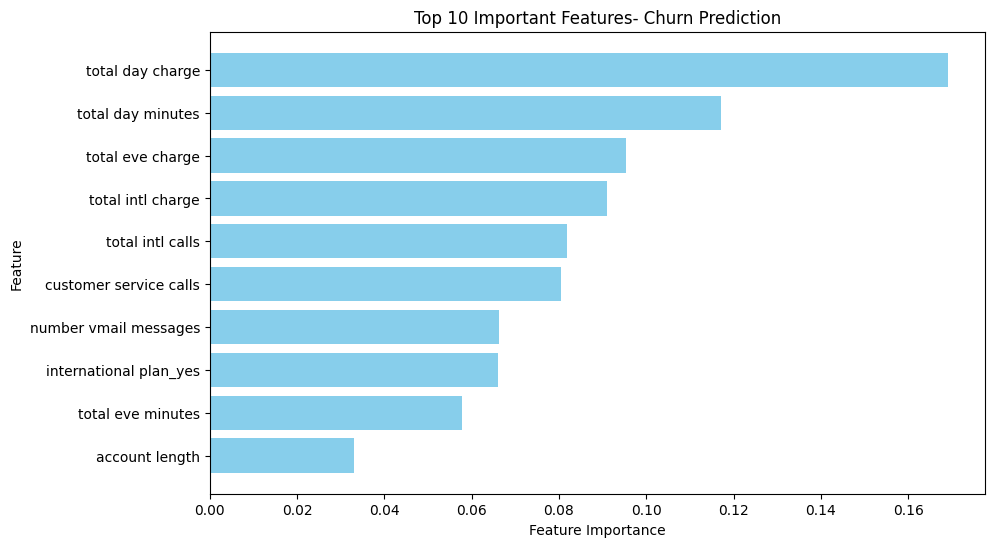

In [60]:
import pandas as pd
import numpy as np

# Calculate feature importances
importances = dt.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use X_train.columns if the features are not scaled; otherwise, use the original column names
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top 10 most important features
print(feature_importances_df.head(10))

# Optionally, visualize the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'].head(10), feature_importances_df['Importance'].head(10), color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features- Churn Prediction')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


**The top 5 most important features in your Decision Tree model are:**

**1.0** Total day charge: Importance = 0.169035

**2.0** Total day minutes: Importance = 0.117161

**3.0** Total eve charge: Importance = 0.095317

**4.0** Total intl charge: Importance = 0.090973

**5.0** Total intl calls: Importance = 0.081775


These features have the highest importance scores, suggesting they have the most significant impact on the model's predictions for customer churn.

##CONCLUSION

In this project, we analyzed customer churn data using Logistic Regression and Decision Tree models to predict churn and improve customer retention.

**The analysis involved several key steps:**

**Data Preprocessing:** We applied one-hot encoding for categorical variables and feature scaling to standardize the data. Outliers were handled using the Z-score method.

**Model Building and Evaluation:**

**Logistic Regression:**

Initially, we fitted a logistic regression model and adjusted the decision threshold to balance precision and recall.

Despite improvements in recall, the model exhibited a trade-off between precision and recall, with an AUC of 0.787 for test data.

**Decision Trees:**

We developed and tuned a Decision Tree model using hyperparameter tuning.

The final model demonstrated high accuracy and AUC scores (0.852 for test data) with balanced precision and recall.


The Decision Tree also highlighted key features affecting churn.


**Feature Importance:** The Decision Tree model revealed that the most critical features influencing churn are total day charge, total day minutes, total eve charge, total intl charge, and total intl calls.

These features are vital for understanding customer behavior and targeting retention strategies.

**Overall, while both models provided valuable insights, the Decision Tree model offered a clearer interpretation of feature importance, which can guide actionable strategies for reducing customer churn.**

##RECOMMENDATIONS

**1. Optimize Pricing and Billing:**

**Review High Charges:** Customers with high total day charges and total evening charges may be sensitive to pricing. Consider offering flexible pricing plans or discounts for high-usage customers to make your services more attractive.

**Introduce Usage-Based Discounts:** Implement discounts or rewards for customers with high total day minutes or total evening minutes. This can incentivize them to stay and use more of your services.

**2. Enhance Customer Service:**

**Reduce Service Calls:** Since customer service calls are a significant feature, focus on improving the efficiency of customer support. Streamline processes to resolve issues faster and reduce the need for customers to call support frequently.

**Proactive Customer Engagement:** Implement proactive customer support measures to address potential issues before they lead to churn. Use predictive analytics to identify customers at risk and reach out with personalized solutions.

**3. Improve International Services:**

**Optimize International Plans:** Customers with high total international charges and total international calls might benefit from enhanced international plans. Offer competitive international calling rates or bundles to cater to their needs and reduce churn.

**Targeted Offers:** Provide special offers or discounts on international services to high-usage customers, encouraging them to stay with your company rather than switching to a competitor.

**4. Improve Customer Retention Programs:**

Loyalty Rewards: Implement loyalty programs that reward customers for their continued usage, especially those with high total day charges or total evening charges. This can enhance customer satisfaction and encourage long-term retention.

**Focussing on these strategies will help reduce churning of customers and more customer retention**